In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm

# ESERCIZIO 1

In [6]:
df=pd.read_csv('SF_Park_Scores.csv',sep=',',decimal='.')
df

,ParkID,PSA,Park,FQ,Score,Facility Type,Facility Name,Address,State,Zipcode,Floor Count,Square Feet,Perimeter Length,Acres,Longitude,Latitude
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795,Basketball Court,Ocean View Basketball Courts,Capitol & Montana St,CA,94112.0,NaN,5572.020314,311.982228,0.127916,-122.456708,37.716335
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957,Ball Field,Glen ball fields,Diamond & Farnum Street,CA,94131.0,NaN,124520.486259,1891.675445,2.858608,-122.440592,37.736008
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864,Dog Play Area,Douglass dog play area,26th & Douglass Street,CA,94114.0,NaN,70655.337234,1153.019646,1.622030,-122.438895,37.746741
3,117,PSA2,Alamo Square,FY05Q4,0.857,Restroom,Gilman Bathrooms,Gilman Ave & Griffith,CA,94124.0,NaN,378.668603,94.257319,0.008693,-122.388772,37.717179
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859,Basketball Court,GGP1 Panhandle Basketball Courts,Stanyan & Great Hwy,CA,94117.0,NaN,4645.553645,279.465313,0.106648,-122.448380,37.772304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5489,151,PSA1,Alice Marble Tennis Courts,FY14Q4,0.985,Restroom,Marina Green Bathrooms East,Marina Blvd,CA,94123.0,1.0,494.310709,93.513952,0.011348,-122.434531,37.806461
5490,28,PSA3,John McLaren Park,FY14Q4,0.769,Ball Field,Parkside ball fields,28th Ave & Vicente,CA,94116.0,NaN,104340.628735,1513.141710,2.395341,-122.484301,37.738385
5491,170,PSA1,Woh Hei Yuen Park,FY14Q4,0.900,Activity Center,GGP3 County Fair Bldg,Stanyan & Great Hwy,CA,94117.0,1.0,28191.724791,1359.813257,0.647196,-122.467165,37.766564
5492,145,PSA1,Ina Coolbrith Mini Park,FY14Q4,0.840,Restroom,Noe Valley Courts Bathrooms,24th & Douglass St,CA,94114.0,1.0,391.332099,98.012448,0.008984,-122.439218,37.751485


#### Punto 2

9 attributi numerici

#### Punto 3

In [8]:
len(df['Park'].unique())

184

#### Punto 4

In [9]:
df['PSA'].unique()

array(['PSA4', 'PSA2', 'PSA6', 'PSA3', 'GGP', 'PSA1', 'PSA5'],
      dtype=object)

In [10]:
len(df['PSA'].unique())

7

#### Punto 5

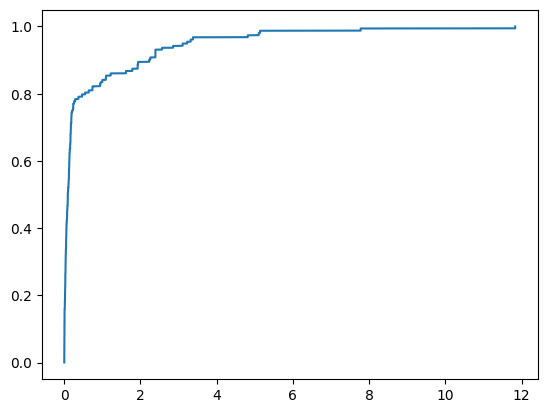

In [57]:
dist = sm.distributions.ECDF(df.Acres.dropna())
plt.plot(dist.x, dist.y)
plt.show()

#### Punto 6

In [29]:
df['Acres'].median()

0.09736824

#### Punto 7

In [28]:
acres=df['Acres'].dropna().mean()
acres

0.6113715709175672

#### Punto 8

In [33]:
df['Acres'].describe()

count    4719.000000
mean        0.611372
std         1.449155
min         0.004893
25%         0.031670
50%         0.097368
75%         0.233998
max        11.833001
Name: Acres, dtype: float64

Considerando che la media equivale a 0.61 e che la mediana equivale a 0.09 possiamo dire che vi sono alcuni parchi con una estensione notevolemnte superiore alla media (outlier) che causano questa notevole differenza tra media e mediana

#### Punto 9

Tutti i parchi di san francisco hanno una dimensione ineriore a 50 acri

#### Esercizio 2

#### Punto 1

In [45]:
lat=df['Latitude']
long=df['Longitude']
print(lat.mean())
print(lat.var())
print(long.mean())
print(long.var())

37.75544933147065
0.000637141392718039
-122.44201432891077
0.0010345732005446172


#### Punto 2

Possiamo considerare le latitudini dei parchi come delle variabili aleatorie identicamente distribuite poichè hanno stessa varianza e stesso valore atteso. 
Fatta questa considerazione, se chiamiamo queste due V.A iid A e B possiamo calcolare
$$Var(A-B) = 2*`sigma^2$$
e quindi dire che la Varianza stimata è 2*0.0006 ~ 0
Stesso ragionamento possiamo applicarlo per la longitudine

#### Punto 3

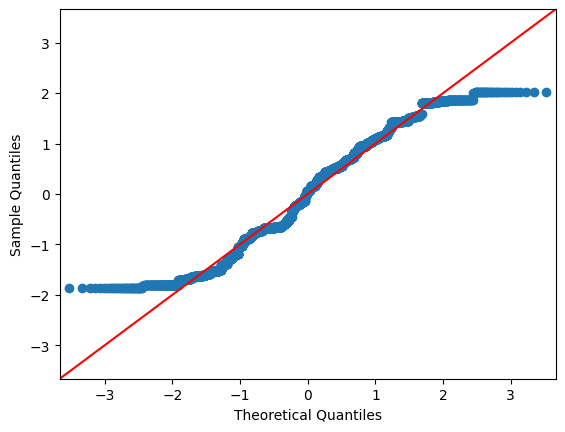

In [74]:
sm.qqplot(lat.dropna(), fit=True, line='45')
plt.show()

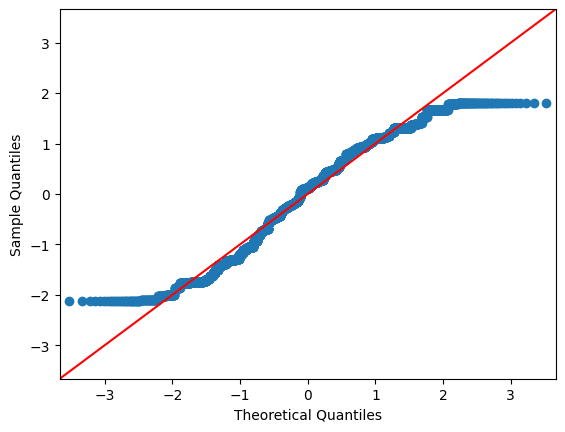

In [71]:
sm.qqplot(long.dropna(),fit=True, line='45')
plt.show()

Si, segue una distribuzione normale come mostrato nei grafici

#### Punto 4

Come da esercizio 0, abbiamo che due variabili aleatorie A - B seguono un modello normale di paraemtr $(0,2\sigma^2)$ e quindi in questo caso $(0,0)$ 

#### Punto 5

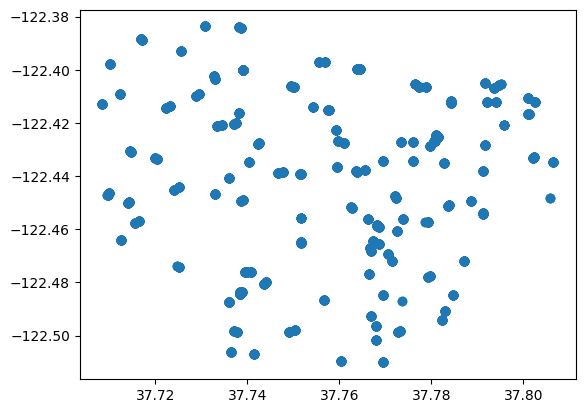

In [75]:
plt.scatter(lat,long)
plt.show()

In [76]:
lat.corr(long)

-0.07568466249044066

#### Punto 6

il coeff. di pearson calcoalto restituisce -0.07 che è un valore molto vicino allo zero. Quando questo coefficiente assume tali valori significa che non vi è correlazione tra i due campioni analizzati.

# Esercizio 3

possiamo vedere A-B come una variabile aleatoria nuova chiamata Z di paramero (0,0). Detto questo possiamo riscrivere la probabilita come $$ P(Z<0.1)$$

Sarebbe come calcolare una cdf su un valore come 0.09 dal momento che in questa disequazione non vi è il minore uguale

In [81]:
dist=st.norm(0,0)
dist.cdf(0.1)

nan